In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'T']

In [3]:
car = pd.read_csv("C:/Users/user/Downloads/car.data", names=column_names,)
car

,buying,maint,doors,persons,lug_boot,safety,T
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in car.columns:
    car[i]=le.fit_transform(car[i])

In [5]:
a = car[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
b = car['T']

In [6]:
car

,buying,maint,doors,persons,lug_boot,safety,T
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [7]:
column_names2 = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

In [8]:
iris = pd.read_csv("C:/Users/user/Downloads/iris (1).data", names=column_names2)
iris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
c = iris[['sepal length', 'sepal width', 'petal length']]
d = iris['petal width']

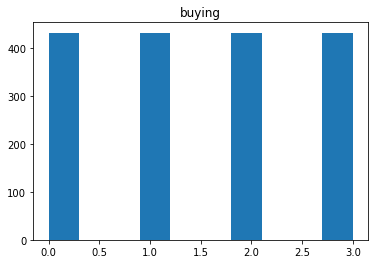

In [10]:
car.describe()
plt.hist(car['buying'])
plt.title('buying')
plt.show()

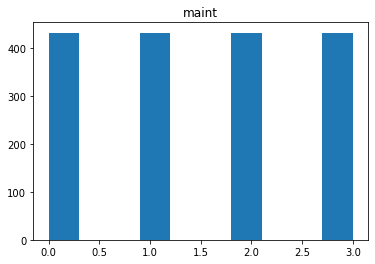

In [11]:
car.describe()
plt.hist(car['maint'])
plt.title('maint')
plt.show()

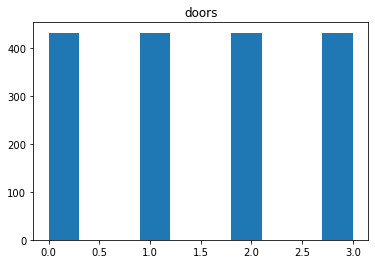

In [12]:
car.describe()
plt.hist(car['doors'])
plt.title('doors')
plt.show()

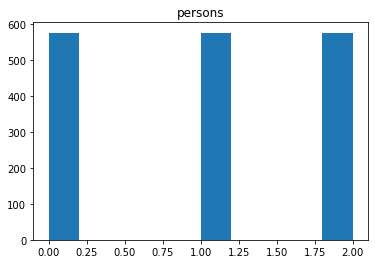

In [13]:
car.describe()
plt.hist(car['persons'])
plt.title('persons')
plt.show()

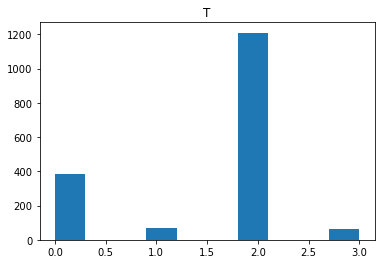

In [14]:
car.describe()
plt.hist(car['T'])
plt.title('T')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    a, b, test_size = 0.2, random_state=42)

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    c, d, test_size = 0.2, random_state=42)

In [17]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, Y_train)

pred_dt = clf_dt.predict(X_test)
cm_dt = confusion_matrix(Y_test, pred_dt)
print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(Y_test, pred_dt))
print (confusion_matrix(Y_test, pred_dt))


--- Decision Tree Classifier ---
0.9682080924855492
[[ 76   6   1   0]
 [  1  10   0   0]
 [  0   0 235   0]
 [  1   2   0  14]]


In [18]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, Y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
cm_svm = confusion_matrix(Y_test, pred_svm)
print(accuracy_score(Y_test, pred_svm))
print(confusion_matrix(Y_test, pred_svm))


--- SVM Classifier ---
0.9132947976878613
[[ 63   0  20   0]
 [  5   5   0   1]
 [  2   0 233   0]
 [  2   0   0  15]]


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, Y_train)
pred = rf_clf.predict(X_test)
cm_rf = confusion_matrix(Y_test, pred)
print(accuracy_score(Y_test,pred))
print (confusion_matrix(Y_test, pred))


--- Radom Forest ---
0.9710982658959537
[[ 75   7   1   0]
 [  0  10   0   1]
 [  0   0 235   0]
 [  1   0   0  16]]


In [21]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, Y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
cm_nn = confusion_matrix(Y_test, pred_nn)
print (accuracy_score(Y_test, pred_nn))
print (confusion_matrix(Y_test, pred_nn))


--- Neural Network Classifier ---
0.9335260115606936
[[ 72   1  10   0]
 [  4   7   0   0]
 [  2   0 233   0]
 [  6   0   0  11]]


In [23]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, Y_train)

pred_lr = clf_lr.predict(X_test)
cm_lr = confusion_matrix(Y_test, pred_lr)
print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(Y_test, pred_lr))
print (confusion_matrix(Y_test, pred_lr))


--- Logistic Regression Classifier ---
0.6589595375722543
[[ 11   0  69   3]
 [  2   0   9   0]
 [ 17   0 217   1]
 [ 12   0   5   0]]


In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error
ly_preds = model.predict(x_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.1961831708665424


In [31]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(x_test)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.21295051807438276


In [32]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(x_test)
mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.2750757471437034


In [33]:
from sklearn.svm import SVR

model = SVR()
model.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error

sry_preds = model.predict(x_test)
mse = np.sqrt(mean_squared_error(sry_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.1961831708665424


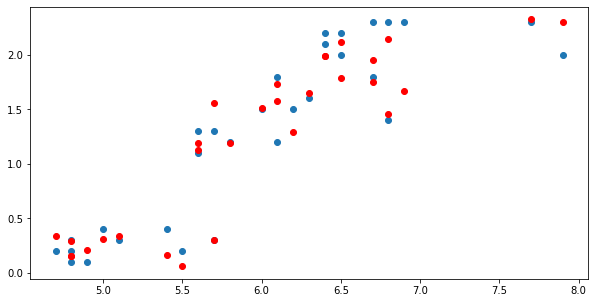

In [34]:
y_test_pred=lr.predict(x_test)
plt.figure(figsize=(10,5))
plt.scatter(x_test['sepal length'], y_test, label='y_test')
plt.scatter(x_test['sepal length'], y_test_pred, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()